# Example MNIST classifier

This is the same notebook as `example_classifier` except that I use the `Fashion MNIST` dataset and modify the default model architecture (by removing `Dropout` and `BatchNormalization`)

## Imports + model initialization

In [1]:
import pandas as pd
import tensorflow as tf

from utils import plot, plot_multiple, set_display_options
from datasets import get_dataset, prepare_dataset, test_dataset_time
from models.classification.base_classifier import BaseClassifier

set_display_options()

model_name = 'fashion_mnist_classifier'
print("Tensorflow version : {}".format(tf.__version__))

Tensorflow version : 2.5.0


In [2]:
input_shape = (28, 28, 1)

config = {
    'labels' : list(range(10)),
    'bnorm' : 'never',
    'drop_rate' : 0.,
    'dense_units' : 28,
    'dense_activation' : None,
    'dense_drop_rate' : 0.
}
model = BaseClassifier(input_shape, nom = model_name, ** config)

print(model)

Initializing submodel : classifier !
Submodel classifier saved in pretrained_models\fashion_mnist_classifier\saving\classifier.json !
Model fashion_mnist_classifier initialized successfully !

========== fashion_mnist_classifier ==========
Sub model classifier
- Inputs 	: (None, 28, 28, 1)
- Outputs 	: (None, 10)
- Number of layers 	: 9
- Number of parameters 	: 0.025 Millions
- Model not compiled

Already trained on 0 epochs (0 steps)

Labels : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Multi-class : False



## Model instanciation + dataset loading

In [2]:
model = BaseClassifier(nom = model_name)

model.compile()

print(model)
model.summary()

Model restoration...
Initializing submodel : classifier !
Optimizer 'classifier_optimizer' initilized successfully !
Submodel classifier compiled !
  Loss : {'reduction': 'auto', 'name': 'sparse_categorical_crossentropy', 'from_logits': False}
  Optimizer : {'name': 'Adam', 'learning_rate': 0.0010000000474974513, 'decay': 0.0, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'epsilon': 1e-07, 'amsgrad': False}
  Metrics : [{'name': 'sparse_categorical_accuracy', 'dtype': 'float32'}]
Successfully restored classifier from pretrained_models/fashion_mnist_classifier/saving/classifier.json !
Model fashion_mnist_classifier initialized successfully !
Model classifier is already compiled !

========== fashion_mnist_classifier ==========
Sub model classifier
- Inputs 	: (None, 28, 28, 1)
- Outputs 	: (None, 10)
- Number of layers 	: 9
- Number of parameters 	: 0.025 Millions
- Optimizer 	: {'name': 'Adam', 'learning_rate': 0.0010000000474974513, 'decay': 0.0, 'beta_1': 0.899999976158

In [4]:
dataset_name = 'fashion_mnist' if 'fashion' in model_name else 'mnist'
ds = get_dataset(dataset_name)

train, valid = ds['train'], ds['test']
print(train)
print(valid)

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


## Training + history analysis

In [5]:
model.train(
    train, validation_data = valid,
    epochs = 25, batch_size = 128,
    augment_prct = 0.25
)

Training config :
HParams :
- augment_prct	: 0.25
- epochs	: 25
- batch_size	: 128
- valid_batch_size	: 32
- test_batch_size	: 1
- verbose	: 1
- train_size	: None
- valid_size	: None
- test_size	: 4
- pred_step	: -1
- shuffle_size	: 1024

Epoch 1/25
    469/Unknown - 3s 7ms/step - loss: 0.8991 - classifier_SparseCategoricalAccuracy: 0.6824
Saving after 1 hour training !

Making prediction at step 469
469/469 [==============================] - 18s 38ms/step - loss: 0.8985 - classifier_SparseCategoricalAccuracy: 0.6826 - val_loss: 0.4238 - val_classifier_SparseCategoricalAccuracy: 0.8488
Epoch 2/25
469/469 [==============================] - ETA: 0s - loss: 0.3936 - classifier_SparseCategoricalAccuracy: 0.8608
Saving at epoch 1 !

Making prediction at step 938
469/469 [==============================] - 9s 19ms/step - loss: 0.3935 - classifier_SparseCategoricalAccuracy: 0.8608 - val_loss: 0.3754 - val_classifier_SparseCategoricalAccuracy: 0.8645
Epoch 3/25
466/469 [========================

===== History =====
        loss  classifier_SparseCategoricalAccuracy  val_loss  \
0   0.605992                              0.780850  0.423766   
1   0.381687                              0.864650  0.375430   
2   0.340853                              0.878483  0.344206   
3   0.315909                              0.887850  0.319828   
4   0.297257                              0.893783  0.309767   
5   0.284209                              0.898950  0.303024   
6   0.273591                              0.904083  0.321247   
7   0.266654                              0.904017  0.303547   
8   0.257558                              0.907900  0.324243   
9   0.251779                              0.908983  0.279413   
10  0.246310                              0.910667  0.284398   
11  0.237898                              0.914967  0.284461   
12  0.233038                              0.916200  0.277392   
13  0.231064                              0.915650  0.276789   
14  0.223967        

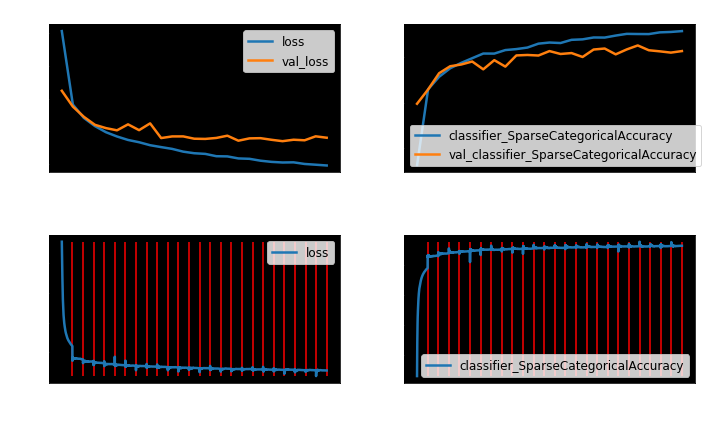

In [6]:
print(model.history)
model.plot_history()

In [7]:
print("Training config :")
print(pd.DataFrame(model.history.trainings_config))
print("\nTraining informations :")
print(pd.DataFrame(model.history.trainings_infos))


Training config :
   augment_prct  epochs  batch_size  valid_batch_size  test_batch_size  verbose train_size  \
0          0.25      25         128                32                1        1       None   

  valid_size  test_size  pred_step  shuffle_size  
0       None          4         -1          1024  

Training informations :
                       start                        end        time  interrupted  start_epoch  \
0 2021-04-14 12:55:42.308868 2021-04-14 12:59:41.397035  239.088167        False           -1   

   final_epoch  
0           24  


In [ ]:
from utils.image import display_image

gifs = model.build_gif(show = False, n_repeat = 15)
display_image(gifs[0]) # only displays embeddings feature gif


## Prediction

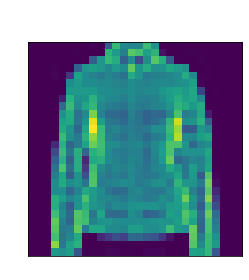

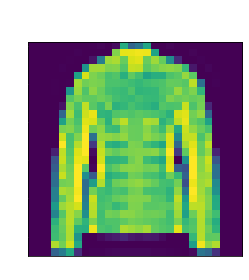

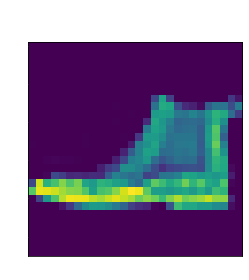

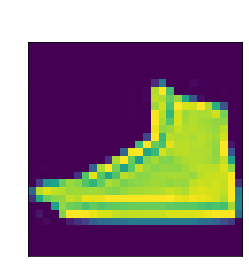

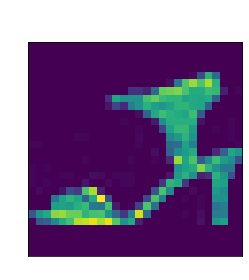

In [9]:
for i, data in enumerate(valid):
    if i >= 5: break
    image, label = data['image'], data['label']
    
    pred, score = model.predict(image)[0]
    plot(
        image, title = 'Class : {}\nPred : {} ({:.2f}%)'.format(label, pred, score * 100),
        plot_type = 'imshow'
    )

## Test dataset performance

These 3 lines allow you to debug your processing pipeline and test its performances

In [5]:
config = model.get_dataset_config(is_validation = False, batch_size = 128)

ds_train = prepare_dataset(train, ** config, debug = True)
test_dataset_time(ds_train, steps = 1000)

0it [00:00, ?it/s]

Original dataset : <DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
- Dataset after mapping : <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int32)>
- Dataset after batch : <DatasetV1Adapter shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int32)>


469it [00:02, 185.60it/s]


469 batchs in 2.532 sec sec (185.229 batch / sec)
Batch infos : 
Element 0 : shape : (96, 28, 28, 1) - type : <dtype: 'float32'> - min : 0.000 - max : 1.000
Element 1 : shape : (96,) - type : <dtype: 'int32'> - min : 0.000 - max : 9.000


2.5320005416870117